In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from glob import glob
# import nwisweb as nwis
import sys
import os
sys.path.append(r'D:\Data\Users\jbellino\GitHub\nwisweb\dev')
import nwisweb_v0_04 as nwis
import matplotlib.pyplot as plt


In [15]:
with open(r'data\sites_dump.csv', 'r') as f:
    all_sites = sorted([site.strip() for site in f.readlines()])
    
data = {}
params = {}
for site in all_sites:
    # Read RDB data
    df_list = []
    rdb_file = r'data\{}_dv_data.rdb'.format(site)
    if os.path.isfile(rdb_file):
        try:
            df, p = nwis.read_rdb(rdb_file)
            params[site] = p
        except:
            pass
        
        try:
            y_field = '_'.join([params[site][0]['dd'], params[site][0]['parameter'], params[site][0]['stat']])
        except:
            pass
        df = df.reset_index()
        df['measurement_dt'] = pd.to_datetime(df['measurement_dt'])
        df = df.set_index(['measurement_dt'])
        df = df.sort_index()
        s = df[y_field]
        s = s[:'12-31-2010']
#         print site, 16*365*.90, s[:'12-31-1994'].count(), s['1-1-1995':'12-31-2010'].count(), s[:'12-31-1994'].count() >= 10*365, s['1-1-1995':'12-31-2010'].count() >= 16*365*.90
        if s[:'12-31-1994'].count() >= 10*365 and s['1-1-1995':'12-31-2010'].count() >= 16*365*.90:

            if '72019' in y_field:
                data[site] = s*-1
            else:
                data[site] = s


In [16]:
len(data)

33

In [17]:
# Compute mean and quartiles
daily_avgs = []
daily_q1s = []
daily_q3s = []
for idx, k in enumerate(sorted(data.keys())):
    s = data[k].copy()
    s = s[:'12-31-1994'].dropna()
    daily_avgs.append(s.groupby([s.index.month, s.index.day]).mean())
    daily_q1s.append(s.groupby([s.index.month, s.index.day]).quantile(q=.25))
    daily_q3s.append(s.groupby([s.index.month, s.index.day]).quantile(q=.75))

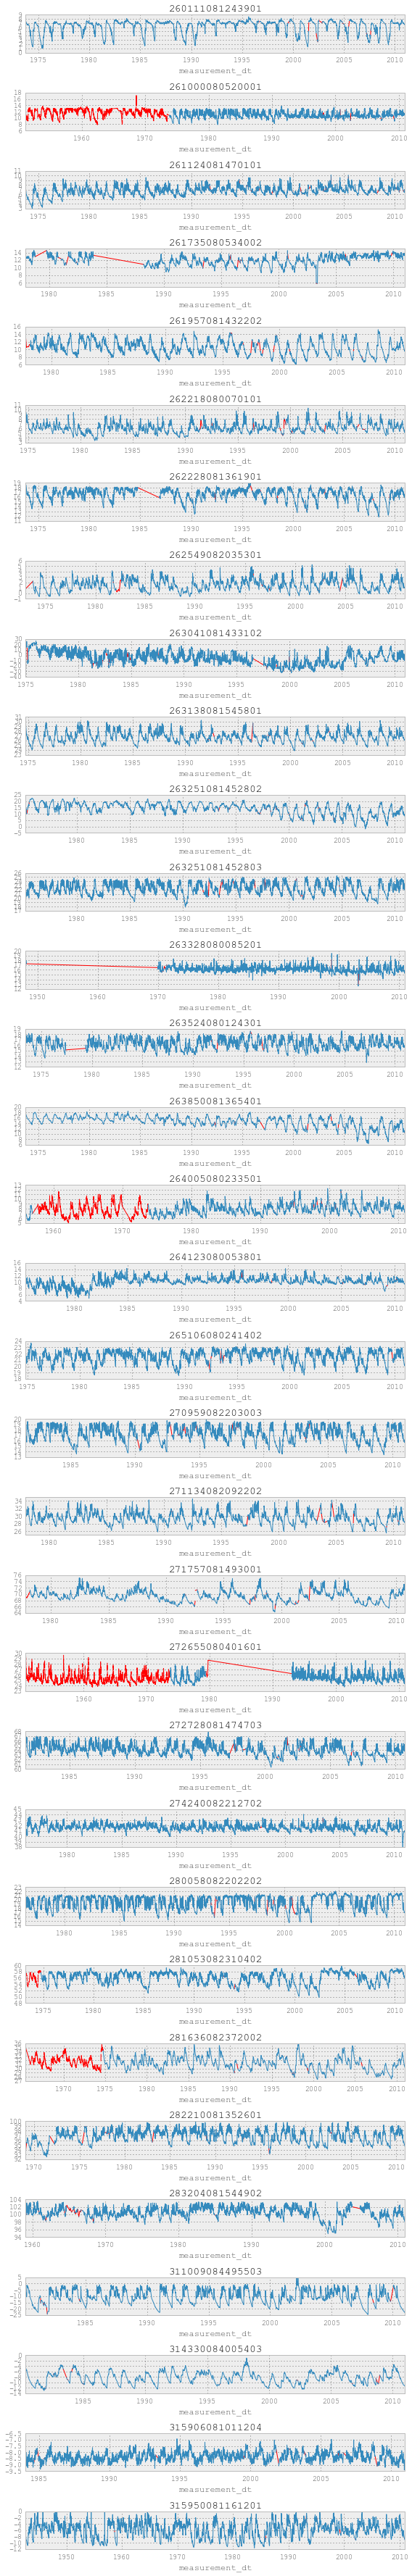

In [22]:
# Plot data (POR)
fig, axes = plt.subplots(len(data), 1, figsize=(8, 1.5*len(data)))
for idx, k in enumerate(sorted(data.keys())):
    s = data[k].copy()
    si = s.interpolate()
    si[s.notnull()] = np.nan
    si.plot(ax=axes[idx], color='red')
    s.plot(ax=axes[idx], title=k)
    plt.tight_layout()
    

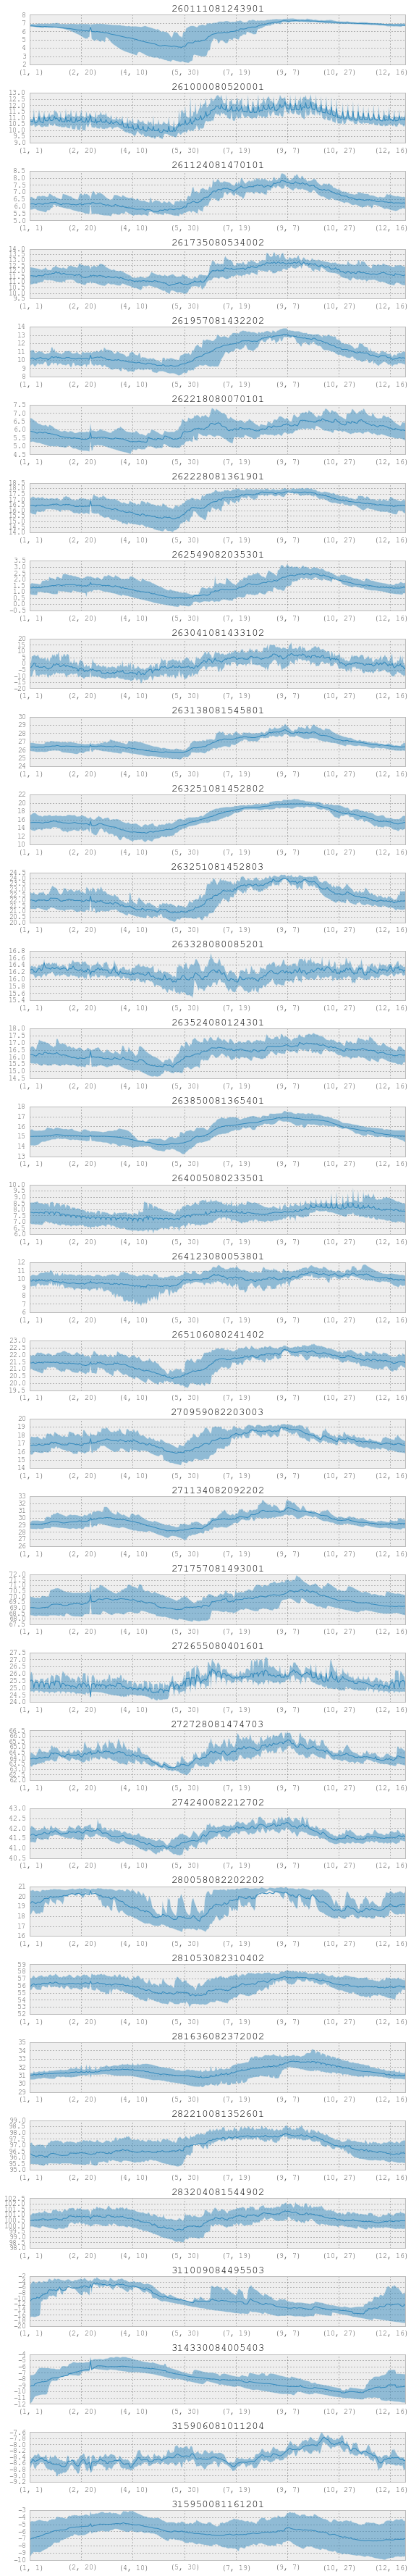

In [23]:
# Plot Q1, mean, and Q3
fig, axes = plt.subplots(len(data), 1, figsize=(8, 1.5*len(data)))
for idx, k in enumerate(sorted(data.keys())):
    s = data[k].copy()
    s = s[:'12-31-1994'].dropna()
    daily_avgs[idx].plot(ax=axes[idx], title=k)
    axes[idx].fill_between(range(len(daily_q1s[idx])), daily_q1s[idx], daily_q3s[idx], alpha=0.5)
    plt.tight_layout()
    

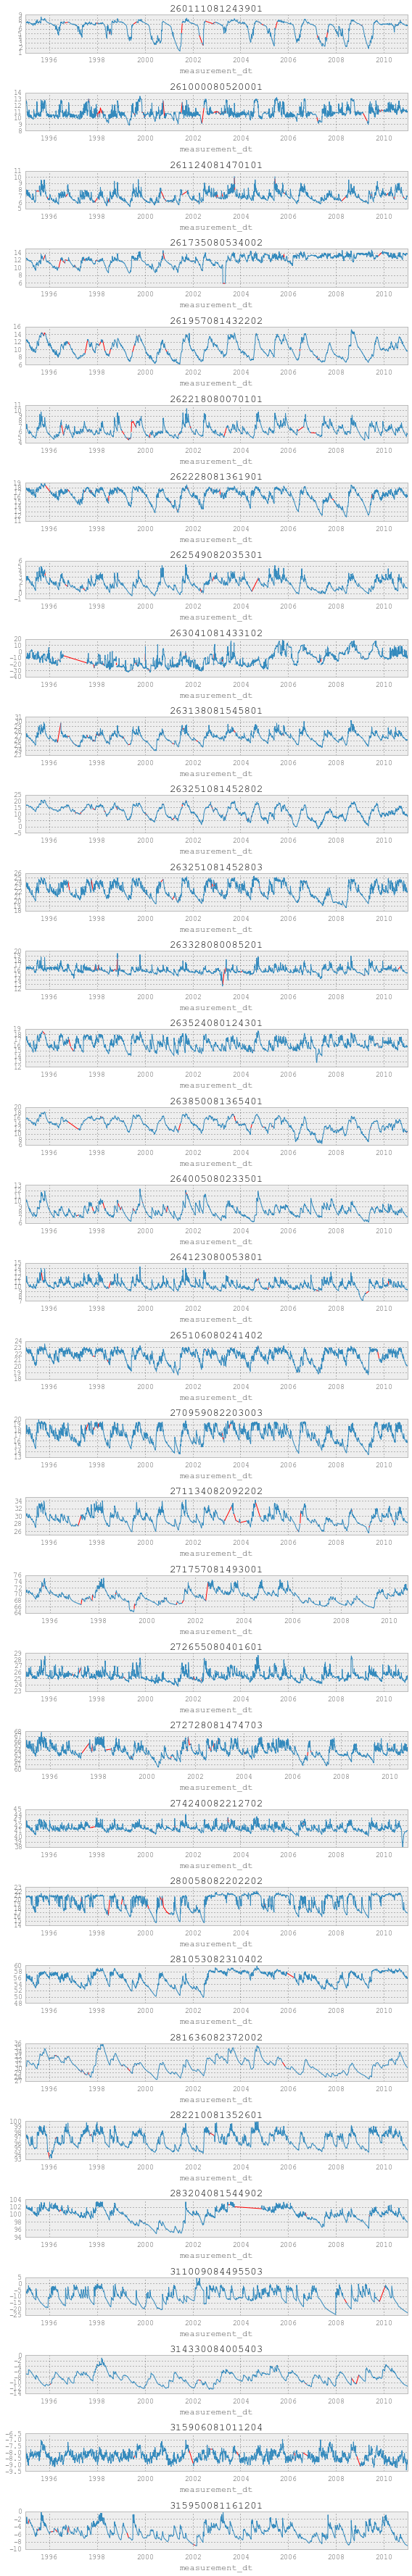

In [24]:
# Plot data (1995-2010)
fig, axes = plt.subplots(len(data), 1, figsize=(8, 1.5*len(data)))
for idx, k in enumerate(sorted(data.keys())):
    s = data[k].copy()
    s = s['1-01-1995':'12-31-2010']
    si = s.interpolate()
    si[s.notnull()] = np.nan
    si.plot(ax=axes[idx], color='red')
    s.plot(ax=axes[idx], title=k)
    plt.tight_layout()
    

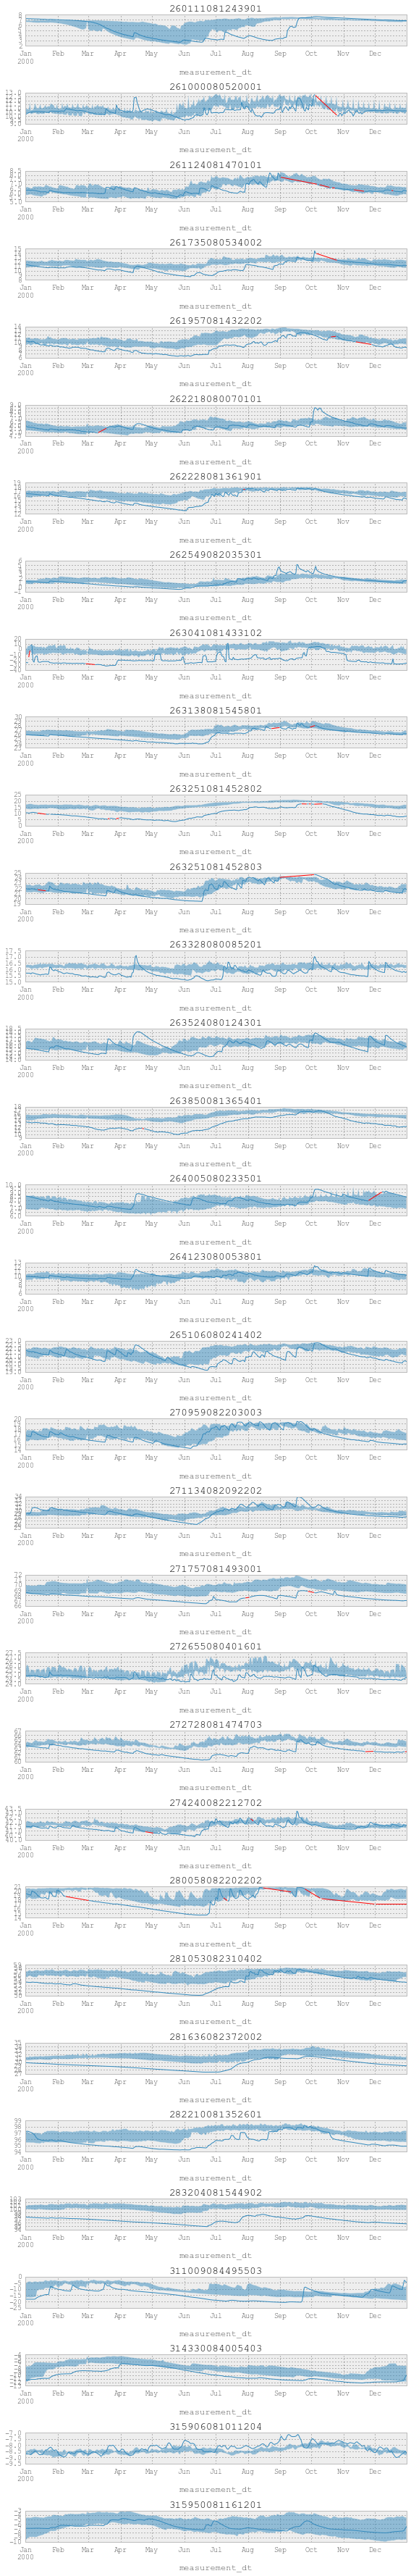

In [25]:
# Plot data (2000)
fig, axes = plt.subplots(len(data), 1, figsize=(8, 1.5*len(data)))
for idx, k in enumerate(sorted(data.keys())):
    s = data[k].copy()
    s = s['1-01-2000':'12-31-2000']
    si = s.interpolate()
    si[s.notnull()] = np.nan
    si.plot(ax=axes[idx], color='red')
    s.plot(ax=axes[idx], title=k)
    axes[idx].fill_between(s.index, daily_q1s[idx], daily_q3s[idx], alpha=0.5)
    plt.tight_layout()
    

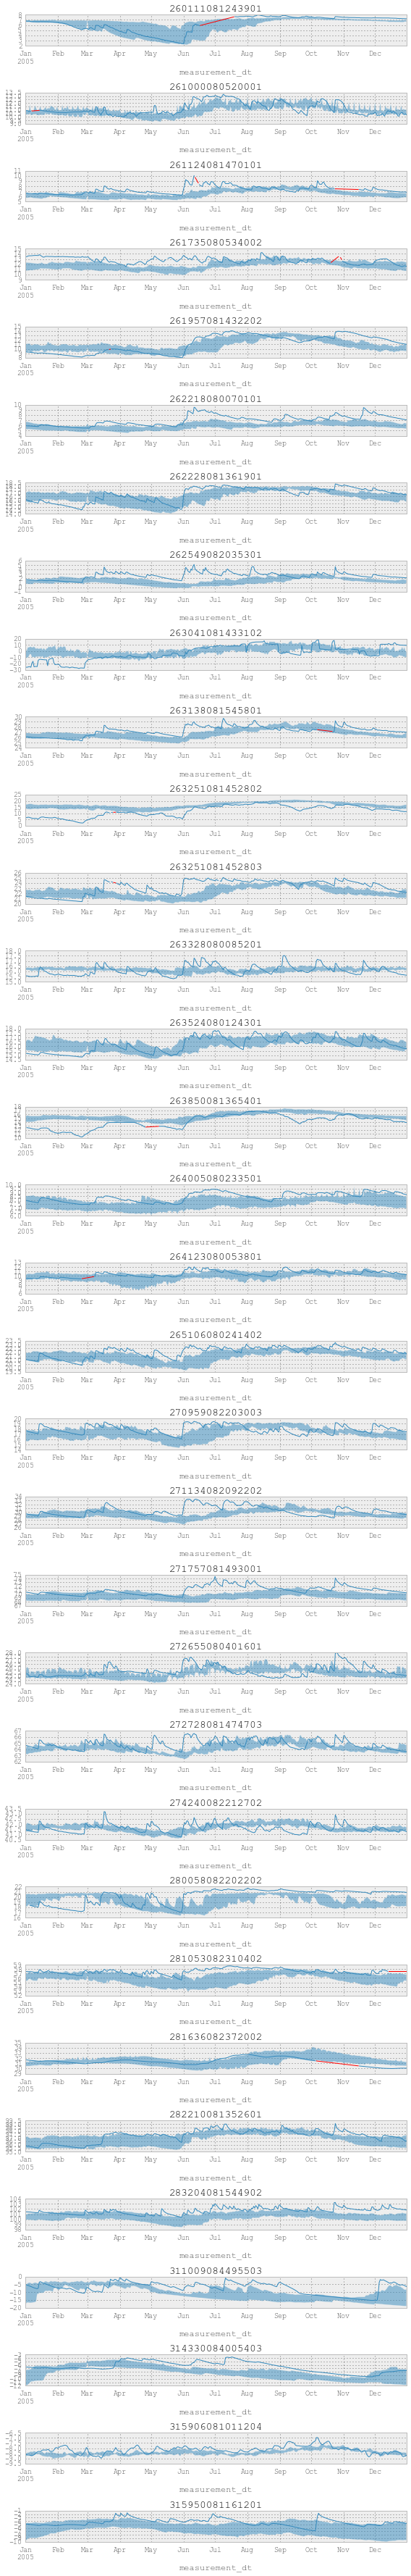

In [26]:
# Plot data (2005)
fig, axes = plt.subplots(len(data), 1, figsize=(8, 1.5*len(data)))
for idx, k in enumerate(sorted(data.keys())):
    s = data[k].copy()
    s = s['1-01-2005':'12-31-2005']
    si = s.interpolate()
    si[s.notnull()] = np.nan
    si.plot(ax=axes[idx], color='red')
    s.plot(ax=axes[idx], title=k)
    axes[idx].fill_between(s.index, daily_q1s[idx].drop([(12, 31)]), daily_q3s[idx].drop([(12, 31)]), alpha=0.5)
    plt.tight_layout()
    

In [ ]:
# Compute average daily change in water level
fig, axes = plt.subplots(len(data), 1, figsize=(8, 1.5*len(data)))
dates = pd.date_range(start='1-1-1995', end='12-30-2010', freq='D')
for idx, k in enumerate(sorted(data.keys())):
    s = data[k].copy()
    dif = pd.Series([(s[date+1]-s[date]) for date in dates], index=dates)
    si = dif.interpolate()
    si[s.notnull()] = np.nan
#     si.plot(ax=axes[idx], color='red')
#     dif.plot(ax=axes[idx], title=k)
#     plt.tight_layout()
    print k, 'Daily change in water level (min, max, mean): {:.2f}, {:.2f}, {:.3f} ft'.format(dif.min(),dif.max(),dif.mean())
 

260111081243901 Difference from daily average (min, max, mean):     -4.04, 0.72, -0.80 ft
261000080520001 Difference from daily average (min, max, mean):     -1.96, 2.26, -0.37 ft
261124081470101 Difference from daily average (min, max, mean):     -1.35, 0.90, -0.13 ft
261735080534002 Difference from daily average (min, max, mean):     -3.09, 1.86, -0.99 ft
261957081432202 Difference from daily average (min, max, mean):     -4.06, 0.24, -1.90 ft
262218080070101 Difference from daily average (min, max, mean):     -1.02, 2.09, -0.09 ft
262228081361901 Difference from daily average (min, max, mean):     -3.36, 0.33, -0.96 ft
262549082035301 Difference from daily average (min, max, mean):     -1.12, 2.77, -0.14 ft
263041081433102 Difference from daily average (min, max, mean):     -29.75, 9.92, -19.92 ft
263138081545801 Difference from daily average (min, max, mean):     -2.53, 0.42, -0.95 ft
263251081452802 Difference from daily average (min, max, mean):     -10.93, -1.42, -6.71 ft
263251

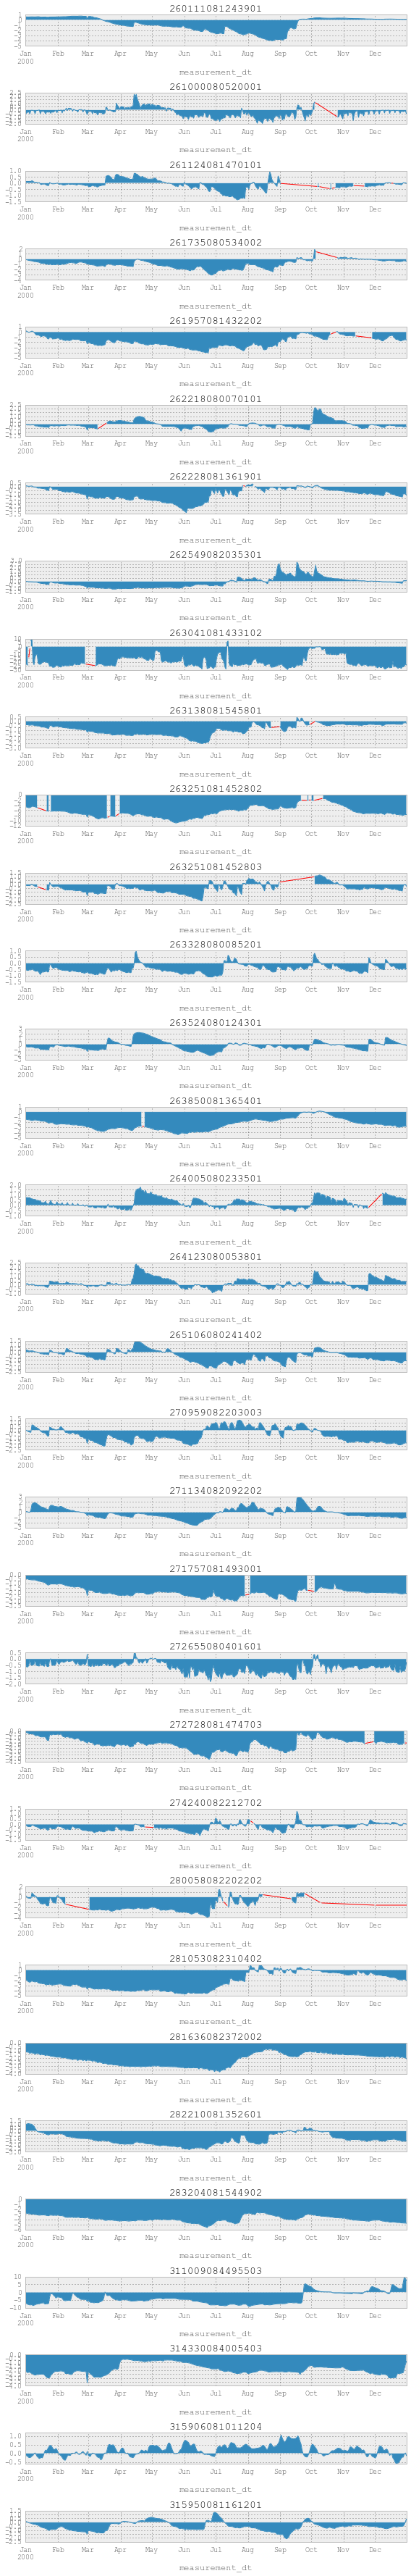

In [37]:
# Compute average difference from daily average (2000 only)
difs = []
fig, axes = plt.subplots(len(data), 1, figsize=(8, 1.5*len(data)))
for idx, k in enumerate(sorted(data.keys())):
    s = data[k].copy()
    s = s['1-1-2000':'12-31-2000']
    daily_avg = daily_avgs[idx].copy()
    daily_avg.index = s.index
    dif = s-daily_avg
    difs.append(dif.mean())
    si = dif.interpolate()
    si[s.notnull()] = np.nan
    si.plot(ax=axes[idx], color='red')
    dif.plot(ax=axes[idx], title=k)
    axes[idx].fill_between(s.index, dif, [0]*len(si))
    plt.tight_layout()
    print k, 'Difference from daily average (min, max, mean): \
    {:.2f}, {:.2f}, {:.2f} ft'.format(dif.min(),dif.max(),dif.mean())

above_avg = [x for x in difs if x>0]
below_avg = [x for x in difs if x<0]
print '{:.1%} of sites above long-term average ({:.2f})'.format(float(len(above_avg))/len(difs), np.mean(above_avg))
print '{:.1%} of sites below long-term average ({:.2f})'.format(float(len(below_avg))/len(difs), np.mean(below_avg))


260111081243901 Difference from daily average (min, max, mean): -1.81, 1.55, 0.07 ft
261000080520001 Difference from daily average (min, max, mean): -1.97, 2.19, 0.20 ft
261124081470101 Difference from daily average (min, max, mean): -0.89, 3.77, 0.72 ft
261735080534002 Difference from daily average (min, max, mean): -0.64, 2.90, 1.02 ft
261957081432202 Difference from daily average (min, max, mean): -2.08, 2.70, 0.23 ft
262218080070101 Difference from daily average (min, max, mean): -0.35, 3.45, 1.06 ft
262228081361901 Difference from daily average (min, max, mean): -1.79, 1.77, 0.20 ft
262549082035301 Difference from daily average (min, max, mean): -0.50, 4.46, 1.18 ft
263041081433102 Difference from daily average (min, max, mean): -26.19, 15.52, -2.40 ft
263138081545801 Difference from daily average (min, max, mean): -1.01, 2.75, 0.50 ft
263251081452802 Difference from daily average (min, max, mean): -12.77, -0.11, -4.35 ft
263251081452803 Difference from daily average (min, max, me

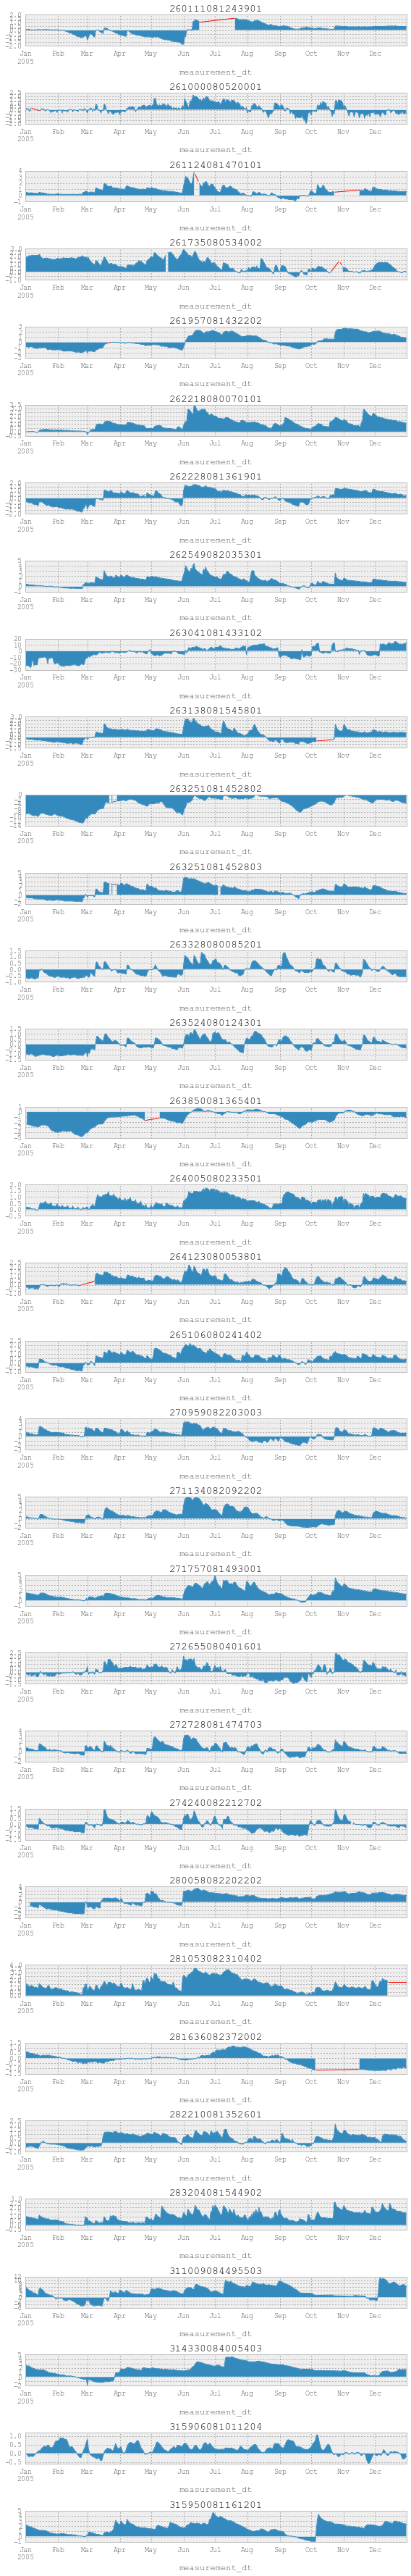

In [38]:
# Compute average difference from daily average (2005 only)
difs = []
fig, axes = plt.subplots(len(data), 1, figsize=(8, 1.5*len(data)))
for idx, k in enumerate(sorted(data.keys())):
    s = data[k].copy()
    s = s['1-1-2005':'12-31-2005']
    daily_avg = daily_avgs[idx].drop([(12, 31)])
    daily_avg.index = s.index
    dif = s-daily_avg
    difs.append(dif.mean())
    si = dif.interpolate()
    si[s.notnull()] = np.nan
    si.plot(ax=axes[idx], color='red')
    dif.plot(ax=axes[idx], title=k)
    axes[idx].fill_between(s.index, dif, [0]*len(si))
    plt.tight_layout()
    print k, 'Difference from daily average (min, max, mean): {:.2f}, {:.2f}, {:.2f} ft'.format(dif.min(),dif.max(),dif.mean())

above_avg = [x for x in difs if x>0]
below_avg = [x for x in difs if x<0]
print '{:.1%} of sites above long-term average ({:.2f})'.format(float(len(above_avg))/len(difs), np.mean(above_avg))
print '{:.1%} of sites below long-term average ({:.2f})'.format(float(len(below_avg))/len(difs), np.mean(below_avg))


260111081243901 Difference from daily average (min, max, mean): -3.96, 3.01, 0.20 ft
261000080520001 Difference from daily average (min, max, mean): -2.27, 2.88, -0.14 ft
261124081470101 Difference from daily average (min, max, mean): -1.35, 3.81, 0.39 ft
261735080534002 Difference from daily average (min, max, mean): -5.43, 3.60, 0.31 ft
261957081432202 Difference from daily average (min, max, mean): -4.73, 3.25, -0.74 ft
262218080070101 Difference from daily average (min, max, mean): -1.54, 3.74, 0.41 ft
262228081361901 Difference from daily average (min, max, mean): -4.06, 2.22, -0.32 ft
262549082035301 Difference from daily average (min, max, mean): -1.41, 4.60, 0.29 ft
263041081433102 Difference from daily average (min, max, mean): -32.70, 13.69, -11.37 ft
263138081545801 Difference from daily average (min, max, mean): -2.43, 3.28, -0.08 ft
263251081452802 Difference from daily average (min, max, mean): -16.03, 2.73, -4.82 ft
263251081452803 Difference from daily average (min, max

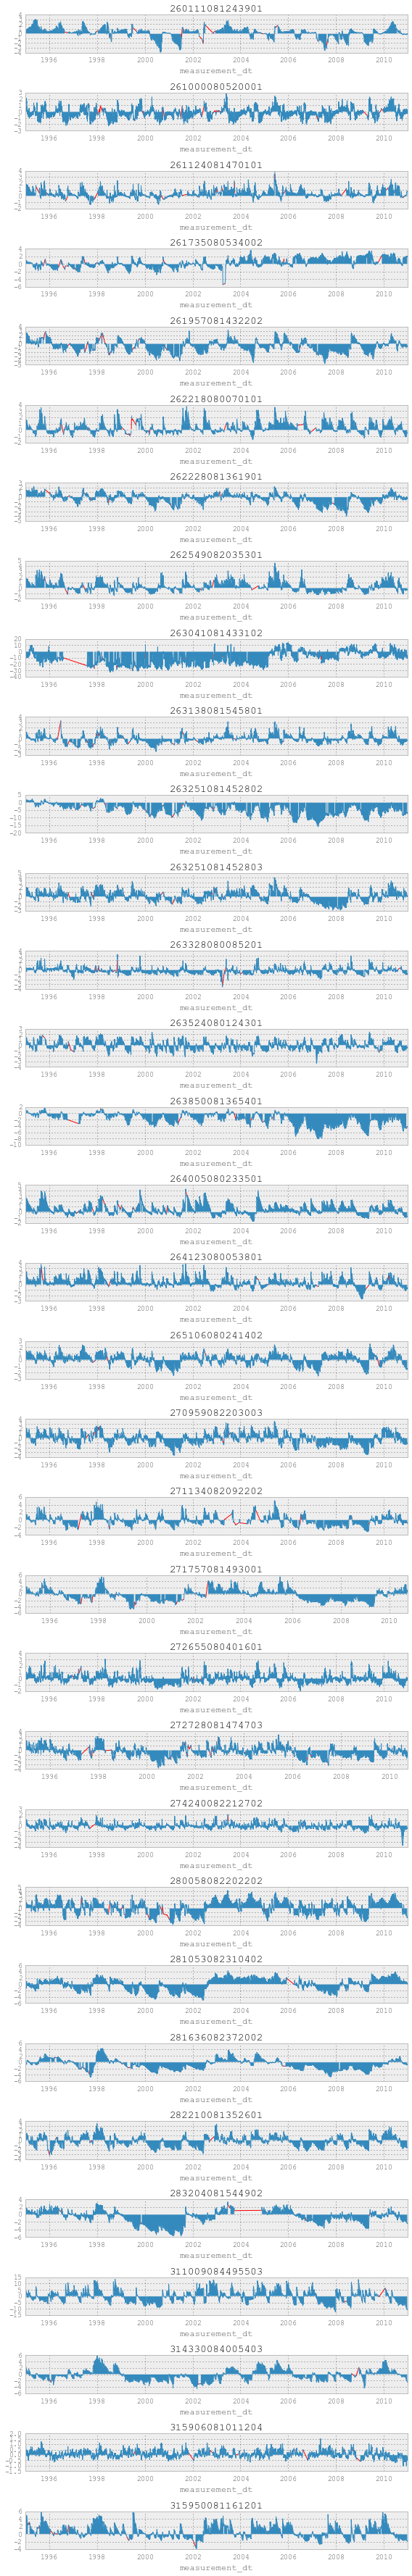

In [40]:
# Compute average difference from daily average (1995-2010)
difs = []
fig, axes = plt.subplots(len(data), 1, figsize=(8, 1.5*len(data)))
for idx, k in enumerate(sorted(data.keys())):
    s = data[k].copy()
    s = s['1-1-1995':'12-31-2010']
    daily_avg = pd.concat([daily_avgs[idx]]*16)
    i = len(daily_avg)-len(s)
    daily_avg = daily_avg[:-i]
    daily_avg.index = s.index
    dif = s-daily_avg
    difs.append(dif.mean())
    si = dif.interpolate()
    si[s.notnull()] = np.nan
    si.plot(ax=axes[idx], color='red')
    dif.plot(ax=axes[idx], title=k)
    axes[idx].fill_between(s.index, dif, [0]*len(si))
    plt.tight_layout()
    print k, 'Difference from daily average (min, max, mean): {:.2f}, {:.2f}, {:.2f} ft'.format(dif.min(),dif.max(),dif.mean())

above_avg = [x for x in difs if x>0]
below_avg = [x for x in difs if x<0]
print '{:.1%} of sites above long-term average ({:.2f})'.format(float(len(above_avg))/len(difs), np.mean(above_avg))
print '{:.1%} of sites below long-term average ({:.2f})'.format(float(len(below_avg))/len(difs), np.mean(below_avg))


In [ ]:
s = data[-1]
s = s['1-1-2005':'12-31-2005']
s = s.interpolate()
s.plot()